In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/college/sem8/DL/mini project/final train images/TrainImageLabels(csv).csv')
df_test = pd.read_csv('/content/drive/MyDrive/college/sem8/DL/mini project/final test images/TestImageLabels(csv).csv')

In [ ]:
df_train.head()

,Image ID,Class
0,4,ecoli
1,5,salmonella
2,14,staphylococus
3,15,listeria
4,16,ecoli


In [ ]:
df_test.head()

,Image ID,Class
0,1422,salmonella
1,1423,listeria
2,1428,salmonella
3,1434,listeria
4,1435,listeria


In [ ]:
print(df_train['Class'].value_counts())

ecoli            114
staphylococus    110
salmonella       103
listeria          97
Name: Class, dtype: int64


In [ ]:
print(df_test['Class'].value_counts())

listeria         56
salmonella       50
staphylococus    40
ecoli            36
Name: Class, dtype: int64


In [ ]:
df_train['Image ID'] = df_train['Image ID'].map(str)
df_test['Image ID'] = df_test['Image ID'].map(str)

In [ ]:
def append_ext(fn):
    return fn+".png"

df_train['Image ID']=df_train['Image ID'].apply(append_ext)
df_test['Image ID']=df_test['Image ID'].apply(append_ext)

In [ ]:
df_train.head()

,Image ID,Class
0,4.png,ecoli
1,5.png,salmonella
2,14.png,staphylococus
3,15.png,listeria
4,16.png,ecoli


In [ ]:
df_test.head()

,Image ID,Class
0,1422.png,salmonella
1,1423.png,listeria
2,1428.png,salmonella
3,1434.png,listeria
4,1435.png,listeria


In [ ]:
x_col="Image ID"
y_col="Class"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_preprocess = ImageDataGenerator(rescale=1./255,  shear_range=0.2, zoom_range=0.25, horizontal_flip=True)
test_preprocess = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data=train_preprocess.flow_from_dataframe(dataframe=df_train,
                                              directory="/content/drive/MyDrive/college/sem8/DL/mini project/final train images/final train images/",
                                              x_col="Image ID",
                                              y_col="Class",
                                              batch_size=32,
                                              seed=42,
                                              shuffle=True,
                                              class_mode="categorical")

Found 424 validated image filenames belonging to 4 classes.


In [ ]:
test_data=test_preprocess.flow_from_dataframe(dataframe=df_test,
                                              directory="/content/drive/MyDrive/college/sem8/DL/mini project/final test images/final test images/",
                                              x_col="Image ID",
                                              y_col="Class",
                                              batch_size=32,
                                              seed=42,
                                              shuffle=True,
                                              class_mode="categorical")

Found 182 validated image filenames belonging to 4 classes.


In [ ]:
train_data[0][0][0].shape

(256, 256, 3)

In [ ]:
test_data[0][0][0].shape

(256, 256, 3)

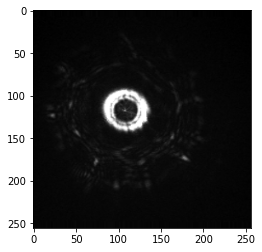

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0][0][0])

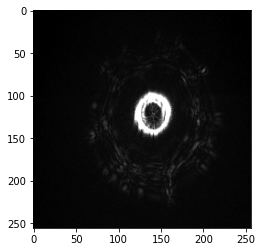

In [ ]:
plt.imshow(test_data[0][0][0])

**MODEL 1: LENET**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, AveragePooling2D, Flatten

model = Sequential()
model.add(Conv2D(6, kernel_size=5, strides=1,  activation='tanh', padding='same', input_shape=(256,256,3)))
model.add(AveragePooling2D())
model.add(Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'))
model.add(AveragePooling2D())
model.add(Flatten()),
model.add(Dense(120, activation='tanh')),
model.add(Dense(84, activation='tanh')),
model.add(Dense(4, activation='softmax'))

In [ ]:
from keras import losses, metrics
model.compile(optimizer='adam', loss = losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(train_data,
          steps_per_epoch=len(train_data),
          epochs=5,
          validation_data=test_data,
          validation_steps = len(test_data))

Epoch 1/5
14/14 [==============================] - 197s 14s/step - loss: 1.1664 - accuracy: 0.6108 - val_loss: 0.3930 - val_accuracy: 0.7912
Epoch 2/5
14/14 [==============================] - 41s 3s/step - loss: 0.3782 - accuracy: 0.8255 - val_loss: 0.1724 - val_accuracy: 0.9670
Epoch 3/5
14/14 [==============================] - 39s 3s/step - loss: 0.1907 - accuracy: 0.9434 - val_loss: 0.0861 - val_accuracy: 0.9890
Epoch 4/5
14/14 [==============================] - 39s 3s/step - loss: 0.1372 - accuracy: 0.9599 - val_loss: 0.1106 - val_accuracy: 0.9615
Epoch 5/5
14/14 [==============================] - 39s 3s/step - loss: 0.0739 - accuracy: 0.9788 - val_loss: 0.1513 - val_accuracy: 0.9286


In [ ]:
model.evaluate(test_data)

6/6 [==============================] - 7s 967ms/step - loss: 0.1513 - accuracy: 0.9286


[0.1513432264328003, 0.9285714030265808]

**MODEL 2: ALEXNET**

In [ ]:
from keras.layers import BatchNormalization, MaxPool2D
model_2 = Sequential()
model_2.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_2.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_2.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_2.add(BatchNormalization())
model_2.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_2.add(BatchNormalization())
model_2.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(4096, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(4096, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(4, activation='softmax'))

In [ ]:
model_2.compile(optimizer='adam', loss = losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model_2.fit(train_data,
          steps_per_epoch=len(train_data),
          epochs=5,
          validation_data=test_data,
          validation_steps = len(test_data))

Epoch 1/5
14/14 [==============================] - 113s 8s/step - loss: 35.0558 - accuracy: 0.3656 - val_loss: 64.7335 - val_accuracy: 0.1978
Epoch 2/5
14/14 [==============================] - 99s 7s/step - loss: 1.6635 - accuracy: 0.6745 - val_loss: 51.2767 - val_accuracy: 0.1978
Epoch 3/5
14/14 [==============================] - 96s 7s/step - loss: 1.0604 - accuracy: 0.7877 - val_loss: 23.1635 - val_accuracy: 0.1978
Epoch 4/5
14/14 [==============================] - 95s 7s/step - loss: 0.6521 - accuracy: 0.8467 - val_loss: 41.2239 - val_accuracy: 0.2473
Epoch 5/5
14/14 [==============================] - 96s 7s/step - loss: 0.5247 - accuracy: 0.8703 - val_loss: 85.5551 - val_accuracy: 0.2747


In [ ]:
model_2.evaluate(test_data)

6/6 [==============================] - 11s 2s/step - loss: 85.5551 - accuracy: 0.2747


[85.55510711669922, 0.2747252881526947]

**MODEL 3: RESNET**

In [ ]:
# Identity block

import tensorflow as tf
import numpy as np
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
# Convolutional block

def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
# ResNet-34 model

def ResNet34(shape = (256, 256, 3), classes = 4):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
model_3 = ResNet34()

In [ ]:
model_3.compile(optimizer='adam', loss = losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model_3.fit(train_data,
          steps_per_epoch=len(train_data),
          epochs=5,
          validation_data=test_data,
          validation_steps = len(test_data))

Epoch 1/5
14/14 [==============================] - 375s 26s/step - loss: 13.5976 - accuracy: 0.3868 - val_loss: 16365067.0000 - val_accuracy: 0.1978
Epoch 2/5
14/14 [==============================] - 357s 26s/step - loss: 1.4247 - accuracy: 0.4458 - val_loss: 4111545.0000 - val_accuracy: 0.4725
Epoch 3/5
14/14 [==============================] - 358s 26s/step - loss: 0.9110 - accuracy: 0.6392 - val_loss: 36789.2539 - val_accuracy: 0.2747
Epoch 4/5
14/14 [==============================] - 349s 25s/step - loss: 0.7876 - accuracy: 0.6958 - val_loss: 522.5739 - val_accuracy: 0.4231
Epoch 5/5
14/14 [==============================] - 355s 25s/step - loss: 0.7865 - accuracy: 0.6934 - val_loss: 6.0065 - val_accuracy: 0.4231


In [ ]:
model_3.evaluate(test_data)

6/6 [==============================] - 38s 6s/step - loss: 6.0065 - accuracy: 0.4231


[6.006506443023682, 0.42307692766189575]